In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

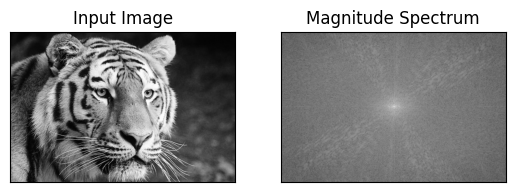

In [ ]:
image_path = '/content/drive/MyDrive/CV/img2.jpg'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

f = np.fft.fft2(image)#convert an image from the spatial domain to the frequency domain using the 2D Fast Fourier Transform (FFT) in NumPy.
fshift = np.fft.fftshift(f) #shifts the zero-frequency component (also called the DC component) of the 2D Fourier transform f to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift)) #used to compute a visually meaningful representation of the frequency spectrum of an image after applying the 2D Fourier Transform

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

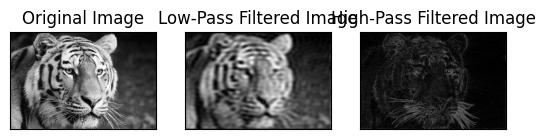

In [ ]:
#Apply frequency domain filtering (low pass and high pass)
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/CV/img2.jpg', 0) # Read as grayscale

#Perform Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Shift the Zero-Frequency Component to the Center:
dft_shift = np.fft.fftshift(dft)

#Low-Pass Filter (LPF): A circular mask with white inside (allowing low frequencies) and black outside (blocking high frequencies).
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Create a blank mask
mask_lpf = np.zeros((rows, cols, 2), np.uint8)

# Draw a white circle (low-pass filter)
radius_lpf = 25 # Adjust this value for different cutoff frequencies       radius_lpf Radius of the circle = cutoff frequency (e.g., 30 pixels)
cv2.circle(mask_lpf, (ccol, crow), radius_lpf, (1, 1), -1)    #(ccol, crow) Center of the frequency domain (col, row) — center of the image
#(1, 1) Color of the circle. (1, 1) means white in a 2-channel mask (real + imaginary)
#-1 Thickness = -1 means fill the circle (not just border)


#High-Pass Filter (HPF): The inverse of the LPF mask, with black inside (blocking low frequencies) and white outside (allowing high frequencies).
# Create a blank mask
mask_hpf = np.ones((rows, cols, 2), np.uint8)

# Draw a black circle (high-pass filter)
radius_hpf = 30 # Adjust this value
cv2.circle(mask_hpf, (ccol, crow), radius_hpf, (0, 0), -1)

#Apply the Mask to the Shifted DFT:

# For Low-Pass Filter
fshift_lpf = dft_shift * mask_lpf

# For High-Pass Filter
fshift_hpf = dft_shift * mask_hpf

#Perform Inverse Shift and Inverse DFT.

# For Low-Pass Filter
f_ishift_lpf = np.fft.ifftshift(fshift_lpf)
img_back_lpf = cv2.idft(f_ishift_lpf)
img_back_lpf = cv2.magnitude(img_back_lpf[:, :, 0], img_back_lpf[:, :, 1])

# For High-Pass Filter
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_back_hpf = cv2.idft(f_ishift_hpf)
img_back_hpf = cv2.magnitude(img_back_hpf[:, :, 0], img_back_hpf[:, :, 1])

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back_lpf, cmap='gray')
plt.title('Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back_hpf, cmap='gray')
plt.title('High-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

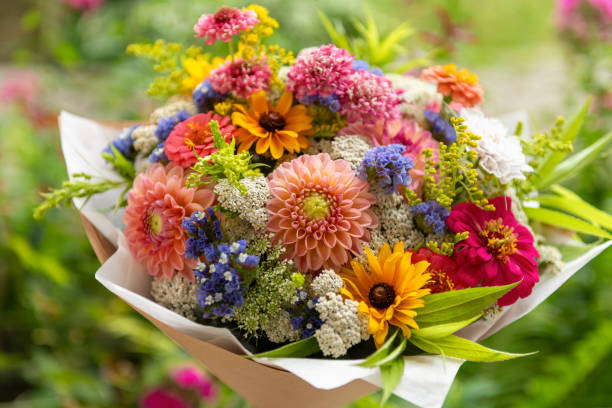

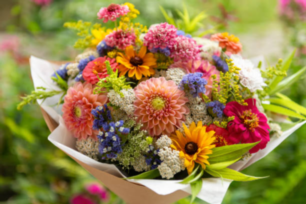

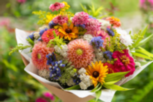

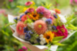

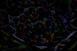

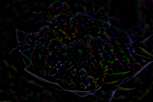

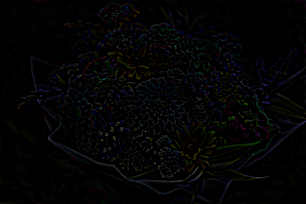

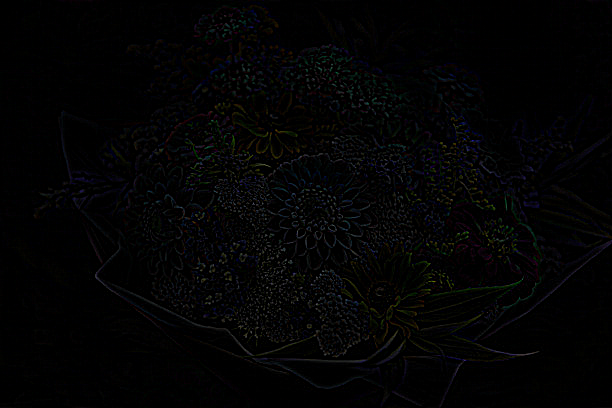

In [ ]:
#Construct Gaussian and Laplacian pyramids of an image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/drive/MyDrive/CV/img4.jpg')

gaussian_pyramid = [img]
for i in range(5):  # Create 5 levels (adjust as needed)
    img = cv2.pyrDown(img)
    gaussian_pyramid.append(img)
#Step 1: Initialize the list and add the last level of the Gaussian pyramid.
laplacian_pyramid = [gaussian_pyramid[-1]]
#Step 2: Generate subsequent levels by subtracting expanded versions.
for i in range(len(gaussian_pyramid) - 1, 0, -1):
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i])
    # Ensure sizes match before subtraction, as pyrUp might not perfectly restore original size
    if gaussian_expanded.shape != gaussian_pyramid[i-1].shape:
        gaussian_expanded = cv2.resize(gaussian_expanded, (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0]))

    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)

# Display Gaussian pyramid levels
for i, level in enumerate(gaussian_pyramid):
    cv2_imshow(level)

# Display Laplacian pyramid levels
for i, level in enumerate(laplacian_pyramid):
    # For visualization, adjust contrast of Laplacian levels as they can have negative values
    display_laplacian = cv2.convertScaleAbs(level)
    cv2_imshow(display_laplacian)

# cv2.waitKey(0) # Not needed with cv2_imshow
# cv2.destroyAllWindows() # Not needed with cv2_imshow

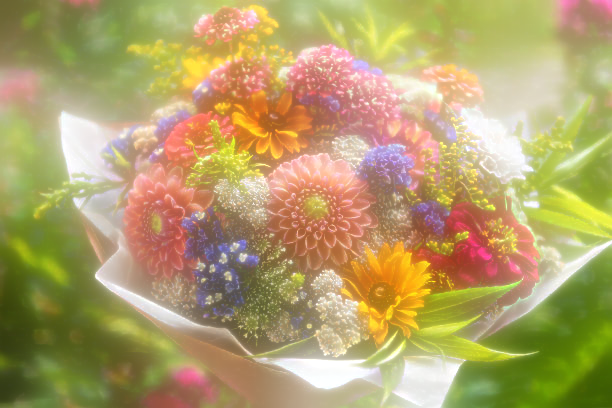

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Reconstruct the image from the Laplacian pyramid
reconstructed = laplacian_pyramid[0]  # Start with the coarsest level (last Gaussian level)

# Iterate through Laplacian pyramid levels in reverse order (coarse to fine)
for i in range(1, len(laplacian_pyramid)):
    # Expand the current reconstructed image to match the size of the next Laplacian level
    reconstructed = cv2.pyrUp(reconstructed)

    # Ensure sizes match, as pyrUp might not perfectly restore the size
    if reconstructed.shape != laplacian_pyramid[i].shape:
        reconstructed = cv2.resize(reconstructed, (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0]))

    # Add the Laplacian level to the expanded image
    reconstructed = cv2.add(reconstructed, laplacian_pyramid[i])

cv2_imshow(reconstructed)


array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]], dtype=uint8)
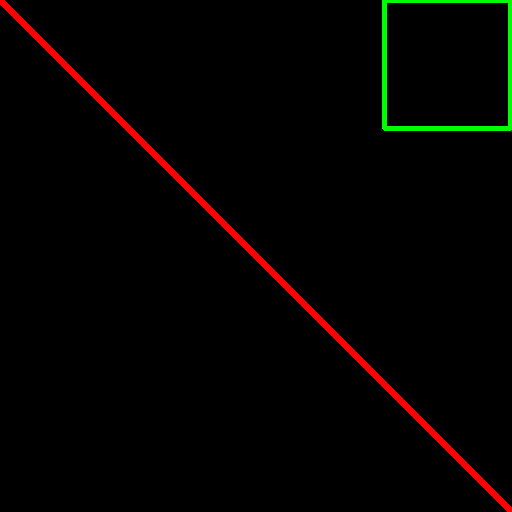

In [ ]:
import numpy as np
import cv2 as cv

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)